In [1]:
# We'll also import a few standard python libraries
from matplotlib import pyplot
import numpy as np
import time

# These are the droids you are looking for.
from caffe2.python import core, workspace
from caffe2.proto import caffe2_pb2
# Let's show all plots inline.
%matplotlib inline

In [2]:
print("Current blobs in the workspace: {}".format(workspace.Blobs()))
print("Workspace has blob 'X'? {}".format(workspace.HasBlob("X")))

Current blobs in the workspace: []
Workspace has blob 'X'? False


In [3]:
X = np.random.randn(2, 3).astype(np.float32)
print("Generated X from numpy:\n{}".format(X))
workspace.FeedBlob("X", X)

Generated X from numpy:
[[-1.446853   -0.22681445  0.5924783 ]
 [-1.2579603   0.690482   -0.10080079]]


True

In [4]:
print("Current blobs in the workspace: {}".format(workspace.Blobs()))
print("Workspace has blob 'X'? {}".format(workspace.HasBlob("X")))
print("Fetched X:\n{}".format(workspace.FetchBlob("X")))

Current blobs in the workspace: ['X']
Workspace has blob 'X'? True
Fetched X:
[[-1.446853   -0.22681445  0.5924783 ]
 [-1.2579603   0.690482   -0.10080079]]


In [5]:
np.testing.assert_array_equal(X, workspace.FetchBlob("X"))


In [6]:
for b in workspace.Blobs(): print(b)

X


In [7]:
try:
    workspace.FetchBlob("invincible_pink_unicorn")
except RuntimeError as err:
    print(err)

[enforce fail at pybind_state.cc:170] ws->HasBlob(name). Can't find blob: invincible_pink_unicorn 


In [8]:
print("Current workspace: {}".format(workspace.CurrentWorkspace()))
print("Current blobs in the workspace: {}".format(workspace.Blobs()))

# Switch the workspace. The second argument "True" means creating
# the workspace if it is missing.
workspace.SwitchWorkspace("gutentag", True)

# Let's print the current workspace. Note that there is nothing in the
# workspace yet.
print("Current workspace: {}".format(workspace.CurrentWorkspace()))
print("Current blobs in the workspace: {}".format(workspace.Blobs()))

Current workspace: default
Current blobs in the workspace: ['X']
Current workspace: gutentag
Current blobs in the workspace: []


In [9]:
workspace.SwitchWorkspace("default")
print("Current workspace: {}".format(workspace.CurrentWorkspace()))
print("Current blobs in the workspace: {}".format(workspace.Blobs()))

Current workspace: default
Current blobs in the workspace: ['X']


In [10]:
workspace.ResetWorkspace()


True

In [11]:
# Create an operator.
op = core.CreateOperator(
    "Relu", # The type of operator that we want to run
    ["X"], # A list of input blobs by their names
    ["Y"], # A list of output blobs by their names
)
# and we are done!

In [12]:
print("Type of the created op is: {}".format(type(op)))
print("Content:\n")
print(str(op))

Type of the created op is: <class 'caffe2.proto.caffe2_pb2.OperatorDef'>
Content:

input: "X"
output: "Y"
name: ""
type: "Relu"



In [13]:
workspace.FeedBlob("X", np.random.randn(2, 3).astype(np.float32))
workspace.RunOperatorOnce(op)

True

In [14]:
print("Current blobs in the workspace: {}\n".format(workspace.Blobs()))
print("X:\n{}\n".format(workspace.FetchBlob("X")))
print("Y:\n{}\n".format(workspace.FetchBlob("Y")))
print("Expected:\n{}\n".format(np.maximum(workspace.FetchBlob("X"), 0)))


Current blobs in the workspace: ['X', 'Y']

X:
[[-0.7115015 -2.5410058 -1.1210927]
 [ 1.4563019 -0.6534222 -1.7765743]]

Y:
[[0.        0.        0.       ]
 [1.4563019 0.        0.       ]]

Expected:
[[0.        0.        0.       ]
 [1.4563019 0.        0.       ]]



In [15]:
op = core.CreateOperator(
    "GaussianFill",
    [], # GaussianFill does not need any parameters.
    ["Z"],
    shape=[100, 100], # shape argument as a list of ints.
    mean=1.0,  # mean as a single float
    std=1.0, # std as a single float
)
print("Content of op:\n")
print(str(op))

Content of op:

output: "Z"
name: ""
type: "GaussianFill"
arg {
  name: "shape"
  ints: 100
  ints: 100
}
arg {
  name: "mean"
  f: 1.0
}
arg {
  name: "std"
  f: 1.0
}



Text(0.5,1,'Distribution of Z')

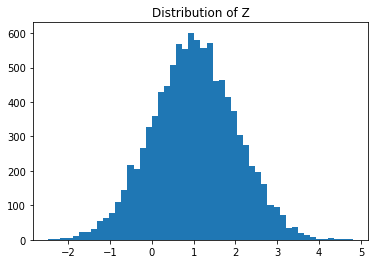

In [16]:
workspace.RunOperatorOnce(op)
temp = workspace.FetchBlob("Z")
pyplot.hist(temp.flatten(), bins=50)
pyplot.title("Distribution of Z")

In [17]:
net = core.Net("my_first_net")
print("Current network proto:\n\n{}".format(net.Proto()))


Current network proto:

name: "my_first_net"



In [18]:
X = net.GaussianFill([], ["X"], mean=0.0, std=1.0, shape=[2, 3], run_once=0)
print("New network proto:\n\n{}".format(net.Proto()))


New network proto:

name: "my_first_net"
op {
  output: "X"
  name: ""
  type: "GaussianFill"
  arg {
    name: "mean"
    f: 0.0
  }
  arg {
    name: "std"
    f: 1.0
  }
  arg {
    name: "shape"
    ints: 2
    ints: 3
  }
  arg {
    name: "run_once"
    i: 0
  }
}



In [19]:
print("Type of X is: {}".format(type(X)))
print("The blob name is: {}".format(str(X)))

Type of X is: <class 'caffe2.python.core.BlobReference'>
The blob name is: X


In [20]:
W = net.GaussianFill([], ["W"], mean=0.0, std=1.0, shape=[5, 3], run_once=0)
b = net.ConstantFill([], ["b"], shape=[5,], value=1.0, run_once=0)

In [21]:
Y = X.FC([W, b], ["Y"])


In [22]:
print("Current network proto:\n\n{}".format(net.Proto()))

Current network proto:

name: "my_first_net"
op {
  output: "X"
  name: ""
  type: "GaussianFill"
  arg {
    name: "mean"
    f: 0.0
  }
  arg {
    name: "std"
    f: 1.0
  }
  arg {
    name: "shape"
    ints: 2
    ints: 3
  }
  arg {
    name: "run_once"
    i: 0
  }
}
op {
  output: "W"
  name: ""
  type: "GaussianFill"
  arg {
    name: "mean"
    f: 0.0
  }
  arg {
    name: "std"
    f: 1.0
  }
  arg {
    name: "shape"
    ints: 5
    ints: 3
  }
  arg {
    name: "run_once"
    i: 0
  }
}
op {
  output: "b"
  name: ""
  type: "ConstantFill"
  arg {
    name: "shape"
    ints: 5
  }
  arg {
    name: "value"
    f: 1.0
  }
  arg {
    name: "run_once"
    i: 0
  }
}
op {
  input: "X"
  input: "W"
  input: "b"
  output: "Y"
  name: ""
  type: "FC"
}



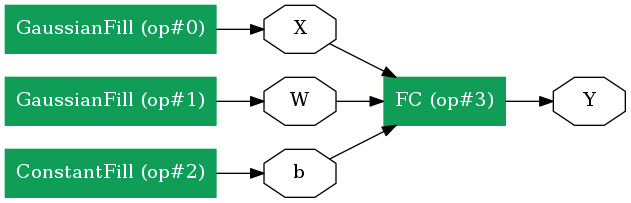

In [23]:
from caffe2.python import net_drawer
from IPython import display
graph = net_drawer.GetPydotGraph(net, rankdir="LR")
display.Image(graph.create_png(), width=800)

In [24]:
workspace.ResetWorkspace()
print("Current blobs in the workspace: {}".format(workspace.Blobs()))
workspace.RunNetOnce(net)
print("Blobs in the workspace after execution: {}".format(workspace.Blobs()))
# Let's dump the contents of the blobs
for name in workspace.Blobs():
    print("{}:\n{}".format(name, workspace.FetchBlob(name)))

Current blobs in the workspace: []
Blobs in the workspace after execution: ['W', 'X', 'Y', 'b']
W:
[[ 1.5830418  -0.65683323  1.1815059 ]
 [-1.7676322   0.5068489   1.1034882 ]
 [ 0.62039465 -0.7234421   0.9451932 ]
 [-0.8398858  -3.0368059  -0.7748456 ]
 [-0.5835791   1.9829174  -1.3057481 ]]
X:
[[-0.88378215  0.0986391  -0.94656616]
 [ 0.7128524   2.122577    1.455649  ]]
Y:
[[-1.582227    1.5676724  -0.51434135  2.1761708   2.947327  ]
 [ 2.454154    2.4220562   1.282558   -7.172472    2.892178  ]]
b:
[1. 1. 1. 1. 1.]


In [25]:
workspace.ResetWorkspace()
print("Current blobs in the workspace: {}".format(workspace.Blobs()))
workspace.CreateNet(net)
workspace.RunNet(net.Proto().name)
print("Blobs in the workspace after execution: {}".format(workspace.Blobs()))
for name in workspace.Blobs():
    print("{}:\n{}".format(name, workspace.FetchBlob(name)))

Current blobs in the workspace: []
Blobs in the workspace after execution: ['W', 'X', 'Y', 'b']
W:
[[ 2.7856562  -1.1505091  -1.636753  ]
 [-1.1375028   1.5981544   0.89925146]
 [-1.5333129  -0.1607386  -0.2568442 ]
 [ 1.1491703  -0.19521211  0.42989784]
 [ 1.4537896   1.0963557   0.12184958]]
X:
[[ 1.8242744   0.21259196 -0.8934122 ]
 [ 0.5331512   0.6649559  -0.11257233]]
Y:
[[ 7.2995076  -1.5387647  -1.6018877   2.6708255   3.7763255 ]
 [ 1.9043913   1.3550104   0.10454184  1.4344795   2.4904008 ]]
b:
[1. 1. 1. 1. 1.]


In [28]:
# It seems that %timeit magic does not work well with
# C++ extensions so we'll basically do for loops

start = time.time()
for i in range(1000):
    workspace.RunNetOnce(net)
end = time.time()
print('Run time per RunNetOnce: {}'.format((end - start) / 1000))

start = time.time()
#workspace.CreateNet(net)
for i in range(1000):
    workspace.RunNet(net.Proto().name)
end = time.time()
print('Run time per RunNet: {}'.format((end - start) / 1000))

Run time per RunNetOnce: 7.342958450317383e-05
Run time per RunNet: 5.2337646484375e-06
